# CNN Model for Classification in cifar10 Dataset

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [0]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [0]:
print(x_train[1312])

[[[196 179 198]
  [185 168 187]
  [182 165 184]
  ...
  [160 149 169]
  [167 155 174]
  [163 149 168]]

 [[193 176 196]
  [188 172 191]
  [186 170 189]
  ...
  [164 150 170]
  [172 158 177]
  [163 150 171]]

 [[189 175 194]
  [187 173 192]
  [187 173 192]
  ...
  [167 155 172]
  [167 153 172]
  [168 156 176]]

 ...

 [[103  72  68]
  [143 104  76]
  [138 103  63]
  ...
  [ 54  42  39]
  [ 57  48  51]
  [ 64  52  55]]

 [[ 96  63  61]
  [118  76  57]
  [127  88  50]
  ...
  [ 74  59  53]
  [ 60  43  39]
  [ 75  56  54]]

 [[101  64  56]
  [104  66  45]
  [124  85  48]
  ...
  [ 69  55  45]
  [ 87  64  50]
  [ 99  74  63]]]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


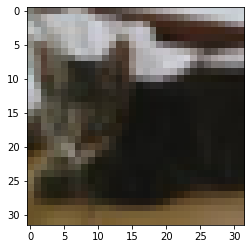

In [0]:
img = plt.imshow(x_train[9])
print(x_train[1])

In [0]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [0]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [0]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

## MEMBANGUN MODEL CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [0]:
model = Sequential() 

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

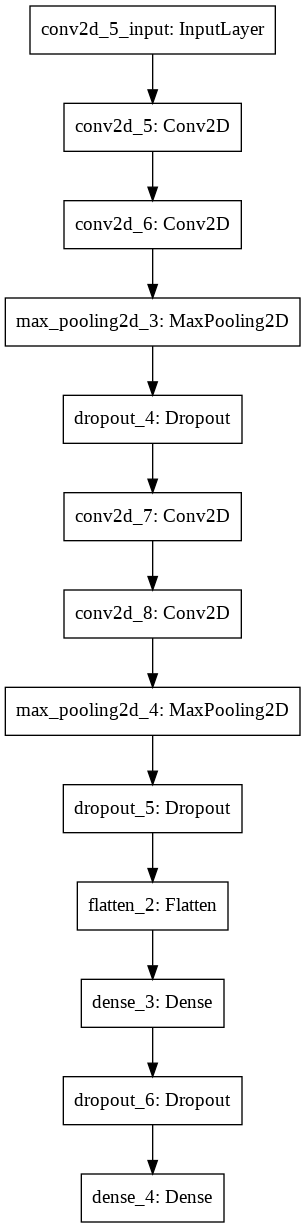

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

## Proses Training

In [0]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=10, 
           validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/1





40000/40000 [==============================] - 240s 6ms/step - loss: 1.5638 - acc: 0.4273 - val_loss: 1.2066 - val_acc: 0.5633


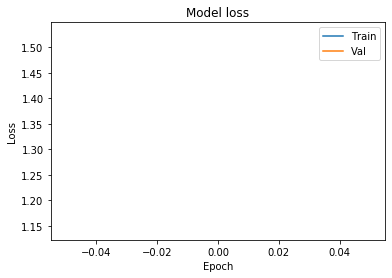

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

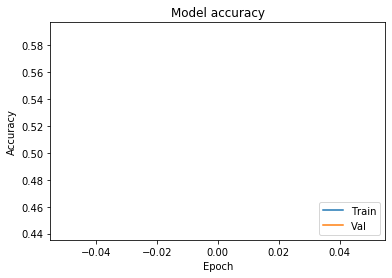

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 12s 1ms/step


0.5672

In [0]:
model.save('my_cifar10_model.h5')

**TESTING MODEL**

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving kapal.jpg to kapal.jpg


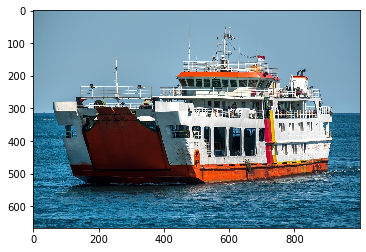

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("kapal.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [0]:
my_image = plt.imread("kapal.jpg")

In [0]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

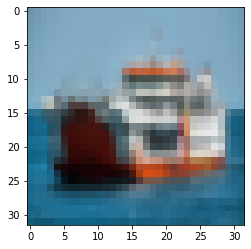

In [0]:
img = plt.imshow(my_image_resized)

In [0]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))
probabilities

array([[7.2475791e-02, 1.7626261e-02, 2.5756268e-03, 1.5346747e-03,
        1.4110766e-03, 1.0548514e-04, 1.4594786e-03, 4.0979015e-05,
        8.9598733e-01, 6.7833108e-03]], dtype=float32)

In [0]:
number_to_class = ['PESAWAT', 'MOBIL', 'BURUNG', 'KUCING', 'RUSA', 'ANJING', 'KATAK', 'KUDA', 'KAPAL', 'TRUK']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Kemungkinan:", probabilities[0,index[9]], "")
print("Second most likely class:", number_to_class[index[8]], "-- Kemungkinan:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Kemungkinan:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Kemungkinan:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Kemungkinan:", probabilities[0,index[5]])

Most likely class: KAPAL -- Kemungkinan: 0.89598733 
Second most likely class: PESAWAT -- Kemungkinan: 0.07247579
Third most likely class: MOBIL -- Kemungkinan: 0.017626261
Fourth most likely class: TRUK -- Kemungkinan: 0.006783311
Fifth most likely class: BURUNG -- Kemungkinan: 0.0025756268
